In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def data_loader(file):
    df = pd.read_csv(file)
    x = (df.iloc[:, 1:]/255.0).to_numpy()
    y = df.iloc[:, 0].to_numpy()
    return (x, y)

In [8]:
file = '../static/files/large/mnist_train.csv'
x_train, y_train = data_loader(file)

In [9]:
test_labels = [8, 4]
indices = np.where(np.isin(y_train, test_labels))[0]

x = x_train[indices]
y = y_train[indices]

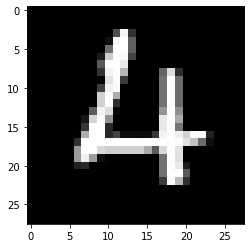

In [17]:
img = x[203, :].reshape(28,28)
example_to_draw = img
plt.imshow(example_to_draw, cmap='gray')
plt.show()

In [22]:
# vertical filter
v_filter = np.array([
    [0,1,0],
    [0,1,0],
    [0,1,0],
])

# horizontal filter
h_filter = np.array([
    [0,0,0],
    [1,1,1],
    [0,0,0]
])

In [23]:
# chunks of codes taken from
# https://www.math.purdue.edu/~bradfor3/ProgrammingFundamentals/NumPy/matrices/

def convolve_1d(array, kernel):
    ks = kernel.shape[0]
    final_length = array.shape[0] - ks + 1
    return np.array([(array[i:i+ks]*kernel).sum() for i in range(final_length)])

def convolve_2d(array, kernel):
    ks = kernel.shape[1]
    final_height = array.shape[1] - ks + 1
    return np.array([convolve_1d(array[:, i:i+ks], kernel) for i in range(final_height)]).T

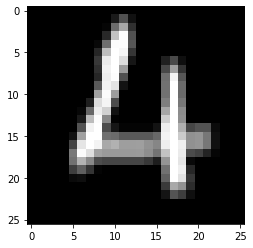

In [24]:
img_v = convolve_2d(img, v_filter)
plt.imshow(img_v, cmap='gray')
plt.show()

In [26]:
img_v.shape

(26, 26)

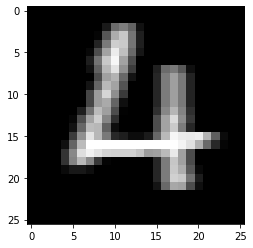

In [25]:
img_h = convolve_2d(img, h_filter)
plt.imshow(img_h, cmap='gray')
plt.show()